# Connect to Google Drive

In [123]:
# You need to download the Diabetics dataset at: https://www.kaggle.com/datasets/kandij/diabetes-dataset/data
# Use Google Drive as Data Storage
# from google.colab import drive
# drive.mount('/content/gdrive')

# !ls -l ./gdrive/MyDrive/Colab\ Notebooks/datasets

# Module imports
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load Data

In [124]:
# load data from "diabetes2.csv" file located on google drive
# rawdata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/diabetes2.csv')

#TEMPORARY FIX TO LOAD DATA LOCALLY INSTEAD OF GOOGLE DRIVE

rawdata = pd.read_csv('diabetes2.csv')

In [125]:
# display the top rows
rawdata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [126]:
# get a quick description of the data, including # of rows, # of features, name of each feature, type of each feature, # of non-null values
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [127]:
# show a summary of the numerical attributes
rawdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#  Task 1: Preprocess Data

In [128]:
data = rawdata.drop(labels="Outcome", axis=1, inplace=False).astype(float)
target = rawdata["Outcome"].copy()

print(data.shape)
print(target.shape)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

data_preprocessed = num_pipeline.fit_transform(data)
# data_preprocessed = rawdata.drop("Outcome", axis=1, inplace=False).astype(float)
target_preprocessed = target.values

(768, 8)
(768,)


# Task 2: Split Dataset for Training, Validation, and Testing

In [129]:
train_data, valid_data, train_target, valid_target = train_test_split(data_preprocessed, target_preprocessed, test_size = 0.20, random_state = 42)
train_data, test_data, train_target, test_target = train_test_split(train_data, train_target, test_size = 0.25, random_state = 42)

#print(train_data)
print(f"train_data.shape: {train_data.shape}")
print(f"train_target.shape: {train_target.shape}")
print()
print(f"valid_data.shape: {valid_data.shape}")
print(f"valid_target.shape: {valid_target.shape}")
print()
print(f"test_data.shape: {test_data.shape}")
print(f"test_target.shape: {test_target.shape}")

train_data.shape: (460, 8)
train_target.shape: (460,)

valid_data.shape: (154, 8)
valid_target.shape: (154,)

test_data.shape: (154, 8)
test_target.shape: (154,)


# Task 3: Use Logistic Regression using Scikit-learn

In [130]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_data, train_target)

print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)
print()

from sklearn.metrics import log_loss
print("training loss using sklearn - log_loss: %.2f" % (log_loss(train_target, lr.predict_proba(train_data))))
print("validation loss using sklearn - log_loss: %.2f" % (log_loss(valid_target, lr.predict_proba(valid_data))))
print("testing loss using sklearn - log_loss: %.2f" % (log_loss(test_target, lr.predict_proba(test_data))))

from sklearn.metrics import confusion_matrix
predictions = lr.predict(test_data)
confusion_matrix(test_target, predictions)

from sklearn.metrics import accuracy_score
print(accuracy_score(test_target, predictions))

from sklearn.metrics import classification_report
print(classification_report(test_target, predictions))



Coefficients: 
 [[ 0.18573298  0.89248159 -0.36580058  0.1072025  -0.15000066  0.78462133
   0.18463707  0.56223892]]
Intercept: 
 [-0.87631239]

training loss using sklearn - log_loss: 0.48
validation loss using sklearn - log_loss: 0.53
testing loss using sklearn - log_loss: 0.45
0.7792207792207793
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       101
           1       0.81      0.47      0.60        53

    accuracy                           0.78       154
   macro avg       0.79      0.71      0.72       154
weighted avg       0.78      0.78      0.76       154



# Task 4: Implement stochastic gradient descent method to perform logistic regression

training loss using SGD method: 0.48
validation loss using SGD method: 0.51
testing loss using SGD method: 0.45
Coefficients:
[ 0.23870705  0.93907133 -0.21501127  0.21756266 -0.21873844  0.57202779
  0.18132894  0.4205132 ]
Intercept:
-0.7663537071277943

1906
0.509608985450545


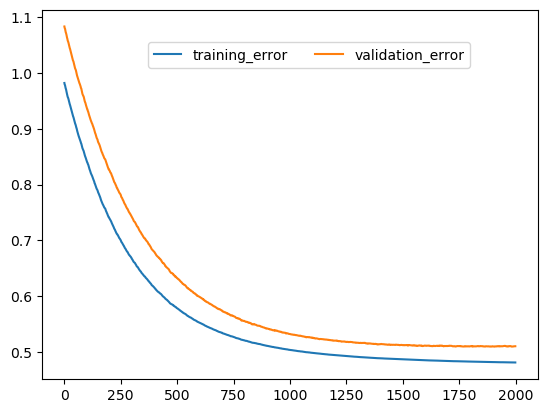

In [140]:
from sklearn.utils import shuffle
import random
np.random.seed(0)

def sigmoid(X, w):
    return 1 / (1 + np.exp(-np.dot(X, w)))

#-1/N * Sum [t log(o) + (1-t)log(1-o)]
# where o = sigmoid(X, w)
def logistic_loss_function(X, w, y):
    sigma = sigmoid(X, w)
    loss = -np.mean(y * np.log(sigma) + (1 - y) * np.log(1 - sigma))
    return loss

# Init Param
epochs = 100
batch_size = 23
w = np.random.normal(0, 0.5, (train_data.shape[1] + 1))
#print(w)
#w = np.zeros(train_data.shape[1])
learning_rate = 0.01

# Data Handling
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
valid_data_intercept = np.insert(valid_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)
batches = epochs * ((int)(train_data.shape[0] / batch_size))
train_losses = np.zeros((batches, 1))
valid_losses = np.zeros((batches, 1))
current_batch = 0

for i in range(epochs):
    rng_train_data, rng_train_target = shuffle(train_data_intercept, train_target)
    
    for j in range(0, rng_train_data.shape[0], batch_size):
        k = j + batch_size
        if k > train_data_intercept.shape[0]:
            break
        batched_train_data = rng_train_data[j:k]
        batched_train_target = rng_train_target[j:k]
        
        # (-1/m)X^T (t-o(Xw))
        grad = (-1 / batch_size) * np.dot(batched_train_data.T, (batched_train_target - sigmoid(batched_train_data, w)))
        
        w = w + learning_rate * (-1 * grad)
        #print(grad)
        
        train_losses[current_batch] = logistic_loss_function(train_data_intercept, w, train_target)
        valid_losses[current_batch] = logistic_loss_function(valid_data_intercept, w, valid_target)
        current_batch += 1

intercept = w[0]
coeff = w[1:]

print("training loss using SGD method: %.2f" % (logistic_loss_function(train_data_intercept, w, train_target)))
print("validation loss using SGD method: %.2f" % (logistic_loss_function(valid_data_intercept, w, valid_target)))
print("testing loss using SGD method: %.2f" % (logistic_loss_function(test_data_intercept, w, test_target)))
print("Coefficients:")
print(coeff)
print("Intercept:")
print(intercept)

plt.plot(np.arange(batches), train_losses, label = "training_error")
plt.plot(np.arange(batches), valid_losses, label = "validation_error")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

print(np.argmin(valid_losses))
print(np.min(valid_losses))
